In [7]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import backend as C
from tensorflow.keras import regularizers
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import load_model,Model
from tensorflow.python.keras.utils import conv_utils
from tensorflow.keras import regularizers, constraints, initializers
from tensorflow.keras.layers import GlobalAveragePooling2D
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

2.16.1


In [8]:
# path define
train_path=("/kaggle/input/dataset-asl/ASL - Copy/asl_alphabet_train/asl_alphabet_train")

# configuration parametres
batch_size = 32
img_height = 224
img_width = 224
no_of_clases = 29
classes_name = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z', 'space','del','nothing']
input_shape = (img_height,img_width,3)

# data augmentation and normalization
datagen = ImageDataGenerator(
    rescale = 1./255,
    featurewise_center=True,
    horizontal_flip=True,
    vertical_flip = True,
    validation_split = 0.1, 
    featurewise_std_normalization = True
)

# data generator
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_height,img_width),
    batch_size = batch_size, 
    shuffle =True,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_height,img_width),
    batch_size = batch_size, 
    shuffle =True,
    class_mode = 'categorical',
    subset='validation'
)

print('train classes')
print(train_generator.class_indices)
print('train labels')
print(train_generator.labels)
print('validation clases')
print(validation_generator.class_indices)
print('validation labels')
print(validation_generator.labels)

Found 15660 images belonging to 29 classes.
Found 1740 images belonging to 29 classes.
train classes
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
train labels
[ 0  0  0 ... 28 28 28]
validation clases
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
validation labels
[ 0  0  0 ... 28 28 28]


In [9]:
# no. of images for 
print(len(train_generator))

490


In [10]:
# loading the pre-trained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

# freezing thw pre-trained model
pretrained_model.trainable = False

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(50, activation='relu')(x)
outputs = tf.keras.layers.Dense(29, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
# print(model.summary())

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# early stopping callback
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15, 
    restore_best_weights=True
)

# training the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    callbacks=[callbacks]
)

/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


490/490 ━━━━━━━━━━━━━━━━━━━━ 97s 177ms/step - accuracy: 0.2246 - loss: 3.0017 - val_accuracy: 0.5793 - val_loss: 1.5724
Epoch 2/25
490/490 ━━━━━━━━━━━━━━━━━━━━ 36s 73ms/step - accuracy: 0.6586 - loss: 1.3238 - val_accuracy: 0.7299 - val_loss: 1.0087
Epoch 3/25
490/490 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.7877 - loss: 0.8081 - val_accuracy: 0.7787 - val_loss: 0.7875
Epoch 4/25
490/490 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.8552 - loss: 0.5582 - val_accuracy: 0.8253 - val_loss: 0.6346
Epoch 5/25
490/490 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.8863 - loss: 0.4206 - val_accuracy: 0.8328 - val_loss: 0.5883
Epoch 6/25
490/490 ━━━━━━━━━━━━━━━━━━━━ 35s 70ms/step - accuracy: 0.9147 - loss: 0.3274 - val_accuracy: 0.8632 - val_loss: 0.4964
Epoch 7/25
490/490 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.9287 - loss: 0.2778 - val_accuracy: 0.8655 - val_loss: 0.4734
Epoch 8/25
490/490 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - accuracy: 0.9422 - loss: 0.2297 - val_accura

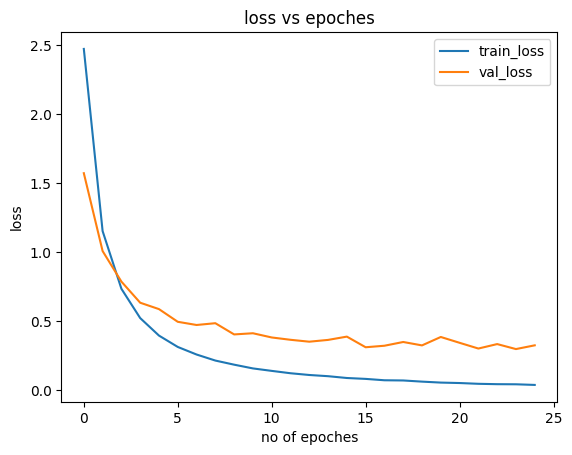

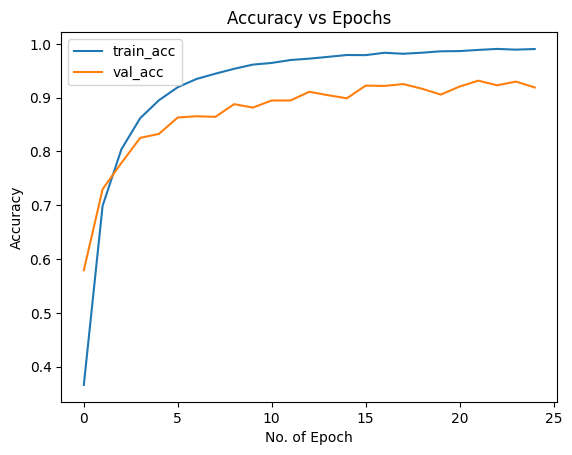

In [14]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel('no of epoches')
plt.ylabel('loss')
plt.title('loss vs epoches')
plt.show()

plt.plot(history.history['accuracy'],label = 'train_acc')
plt.plot(history.history['val_accuracy'],label = 'val_acc')
plt.legend()
plt.xlabel('No. of Epoch')
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.show()

In [15]:
model.save("/kaggle/working/MobileNetV2_ASL.keras")

In [16]:
from tensorflow.keras.models import load_model

model = load_model('/kaggle/working/MobileNetV2_ASL.keras')  

In [21]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, accuracy_score

# Define image dimensions
img_height, img_width = 224, 224

# Directory containing test images
test_dir = '/kaggle/input/dataset-asl/ASL - Copy/asl_alphabet_test/asl_alphabet_test'

# Load and preprocess images, and extract true labels
test_images = []
true_labels = []

for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    test_images.append(img_array)

    # # Extract true label from the filename
    # # Assuming the label is the part before '.jpg'
    # true_label = img_name.split('.')[0]
    # true_labels.append(true_label)
    # Extract true label from the filename
    # Assuming the label is the part before the first underscore
    true_label = img_name.split('_')[0]
    true_labels.append(true_label)


test_images = np.array(test_images)

In [22]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [23]:
# Map predicted labels to class names
label_map = train_generator.class_indices
inverse_label_map = {v: k for k, v in label_map.items()}
predicted_class_names = [inverse_label_map[i] for i in predicted_labels]

In [24]:
# Calculate testing accuracy
accuracy = accuracy_score(true_labels, predicted_class_names)
print(f"Testing Accuracy: {accuracy:.4f}")

Testing Accuracy: 0.9286


In [25]:
# Generate classification report
print(classification_report(true_labels, predicted_class_names))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         1
           B       1.00      1.00      1.00         1
           C       1.00      1.00      1.00         1
           D       1.00      1.00      1.00         1
           E       1.00      1.00      1.00         1
           F       1.00      1.00      1.00         1
           G       0.50      1.00      0.67         1
           H       1.00      1.00      1.00         1
           I       1.00      1.00      1.00         1
           J       1.00      1.00      1.00         1
           K       1.00      1.00      1.00         1
           L       1.00      1.00      1.00         1
           M       1.00      1.00      1.00         1
           N       1.00      1.00      1.00         1
           O       1.00      1.00      1.00         1
           P       1.00      1.00      1.00         1
           Q       1.00      1.00      1.00         1
           R       1.00    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Print individual predictions
for img_name, true_label, pred_label in zip(os.listdir(test_dir), true_labels, predicted_class_names):
    print(f"Image: {img_name}, True Label: {true_label} --> Predicted Label: {pred_label}")

Image: A_test.jpg, True Label: A --> Predicted Label: S
Image: E_test.jpg, True Label: E --> Predicted Label: E
Image: L_test.jpg, True Label: L --> Predicted Label: L
Image: N_test.jpg, True Label: N --> Predicted Label: N
Image: S_test.jpg, True Label: S --> Predicted Label: S
Image: D_test.jpg, True Label: D --> Predicted Label: D
Image: G_test.jpg, True Label: G --> Predicted Label: G
Image: I_test.jpg, True Label: I --> Predicted Label: I
Image: W_test.jpg, True Label: W --> Predicted Label: W
Image: M_test.jpg, True Label: M --> Predicted Label: M
Image: nothing_test.jpg, True Label: nothing --> Predicted Label: nothing
Image: X_test.jpg, True Label: X --> Predicted Label: X
Image: H_test.jpg, True Label: H --> Predicted Label: H
Image: Q_test.jpg, True Label: Q --> Predicted Label: Q
Image: C_test.jpg, True Label: C --> Predicted Label: C
Image: T_test.jpg, True Label: T --> Predicted Label: T
Image: P_test.jpg, True Label: P --> Predicted Label: P
Image: V_test.jpg, True Label: